In [1]:
%load_ext autoreload
%autoreload 2
from helper import *
%config InlineBackend.figure_format='retina'

## Load and Clean Baseline Data

Baseline measurement point is selected and the data is cleaned by
- dropping duplicates 
- dropping missing values
- removing low frequency items ('cbcl_q02_p': Drinks alcohol without parents' approval, 'cbcl_q73_p': Sexual problems,'cbcl_q99_p': Smokes, chews, or sniffs tobacco, 'cbcl_q101_p': Truancy, skips school, 'cbcl_q105_p: Uses drugs for non medical purposes (don't include alcohol or tobacco)
- obtain items that are highly correlated 

In [2]:
alldata = abcd_data()
alldata_1 = get_data_with_followups(alldata, followups = '1y_follow_up')
abcd_baseline = abcd_data(measurement = 'baseline', load = False, df = alldata_1)
baseline_clean = prepare_data(abcd_baseline)
item_list = filter_polychoric_corr(baseline_clean)

cbcl_q08_p with cbcl_q10_p


Can't concentrate, can't pay attention for long with 
Can't sit still, restless, or hyperactive


cbcl_q08_p with cbcl_q78_p


Can't concentrate, can't pay attention for long with 
Inattentive or easily distracted 


cbcl_q16_p with cbcl_q97_p


Cruelty, bullying, or meanness to others with 
Threatens people


cbcl_q20_p with cbcl_q21_p


Destroys their own things with 
Destroys things belonging to their family or others


cbcl_q21_p with cbcl_q106_p


Destroys things belonging to their family or others with 
Vandalism


cbcl_q22_p with cbcl_q28_p


Disobedient at home  with 
Breaks rules at home, school or elsewhere 


cbcl_q23_p with cbcl_q28_p


Disobedient at school with 
Breaks rules at home, school or elsewhere 


cbcl_q25_p with cbcl_q48_p


Doesn't get along with other kids with 
Not liked by other kids


cbcl_q40_p with cbcl_q70_p


Hears sound or voices that aren't there with 
Sees things that aren't there


cbcl_q53_p with cbcl_q55_p


Overeating

### Create Aggregates
An aggregate dictionary is created by assessing the highly correlated items (polychoric correlation > .75) and semantically clustering them. This is a manual process as it requires inspection. Then the prepared baseline data and its polchorical correlation matrix are obtained for further analysis.

In [4]:
aggregate_dict = {"cbcl_q8182_steals": ['cbcl_q81_p', 'cbcl_q82_p'], 
                  "cbcl_q165797_attacks/threatens/bullies": ['cbcl_q57_p', 'cbcl_q16_p', 'cbcl_q97_p'],
                  "cbcl_q56cf_stomach_issues":['cbcl_q56c_p', 'cbcl_q56f_p'],
                  "cbcl_q5355_weight_problems":['cbcl_q53_p', 'cbcl_q55_p'],
                  "cbcl_q4070_hallucinaitons": ['cbcl_q70_p', 'cbcl_q40_p'],
                  "cbcl_q2548_peer_problems": ['cbcl_q25_p', 'cbcl_q48_p'],
                  "cbcl_q222328_disobeys_rules": ['cbcl_q28_p', 'cbcl_q23_p', 'cbcl_q22_p'],
                  "cbcl_q21106_destroys": ['cbcl_q20_p', 'cbcl_q106_p', 'cbcl_q21_p'],
                  "cbcl_q081078_distracted/hyperactive": ['cbcl_q10_p', 'cbcl_q78_p', 'cbcl_q08_p']}

baseline_data = aggregate_items(baseline_clean, item_list, aggregate_dict)
baseline_polycorr = common.polychoric.polychoric_correlation_serial(get_question_items(baseline_data, 'cbcl_q').to_numpy().T,0,3)


# Exploratory Factor Analysis

Initially, the EFA is run with 101 factors and without rotation to obtain the number of factors to extract. Key parameters are inspected and plotted.

In [5]:
EFA_df = get_question_items(baseline_data, 'cbcl_q')

adequacy_test(EFA_df, baseline_polycorr)

The data is suitable for an EFA. Sphericity test was significant with a p-value of 0.0.


The data is suitable for an EFA. KMO test resulted in a value of 0.9906828726155157.




/Users/sarah/miniconda3/envs/ABCD/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [6]:
# fit factor analysis 
efa = FactorAnalyzer(n_factors = 101, rotation = None, is_corr_matrix=False , method = 'principal')
efa.fit(EFA_df)


FactorAnalyzer(method='principal', n_factors=101, rotation=None,
               rotation_kwargs={})

Communalities are inspected, these are all 1 when using 'principal' as the extraction method as PAF makes the assumption that there is no unique variance.

In [6]:
efa.get_communalities()  

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
pd.DataFrame(efa.get_factor_variance())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,17.255460,3.483805,2.360689,2.223541,1.854817,1.787322,1.580749,1.477259,1.430460,1.370941,...,0.453158,0.443371,0.439005,0.429929,0.424573,0.416503,0.413160,0.393921,0.381723,0.339353
1,0.170846,0.034493,0.023373,0.022015,0.018365,0.017696,0.015651,0.014626,0.014163,0.013574,...,0.004487,0.004390,0.004347,0.004257,0.004204,0.004124,0.004091,0.003900,0.003779,0.003360
2,0.170846,0.205339,0.228712,0.250728,0.269092,0.286788,0.302439,0.317066,0.331229,0.344802,...,0.963549,0.967939,0.972286,0.976542,0.980746,0.984870,0.988960,0.992861,0.996640,1.000000


When looking at the unrotated loading's matrix, it becomes evident that most items load on the first factor.

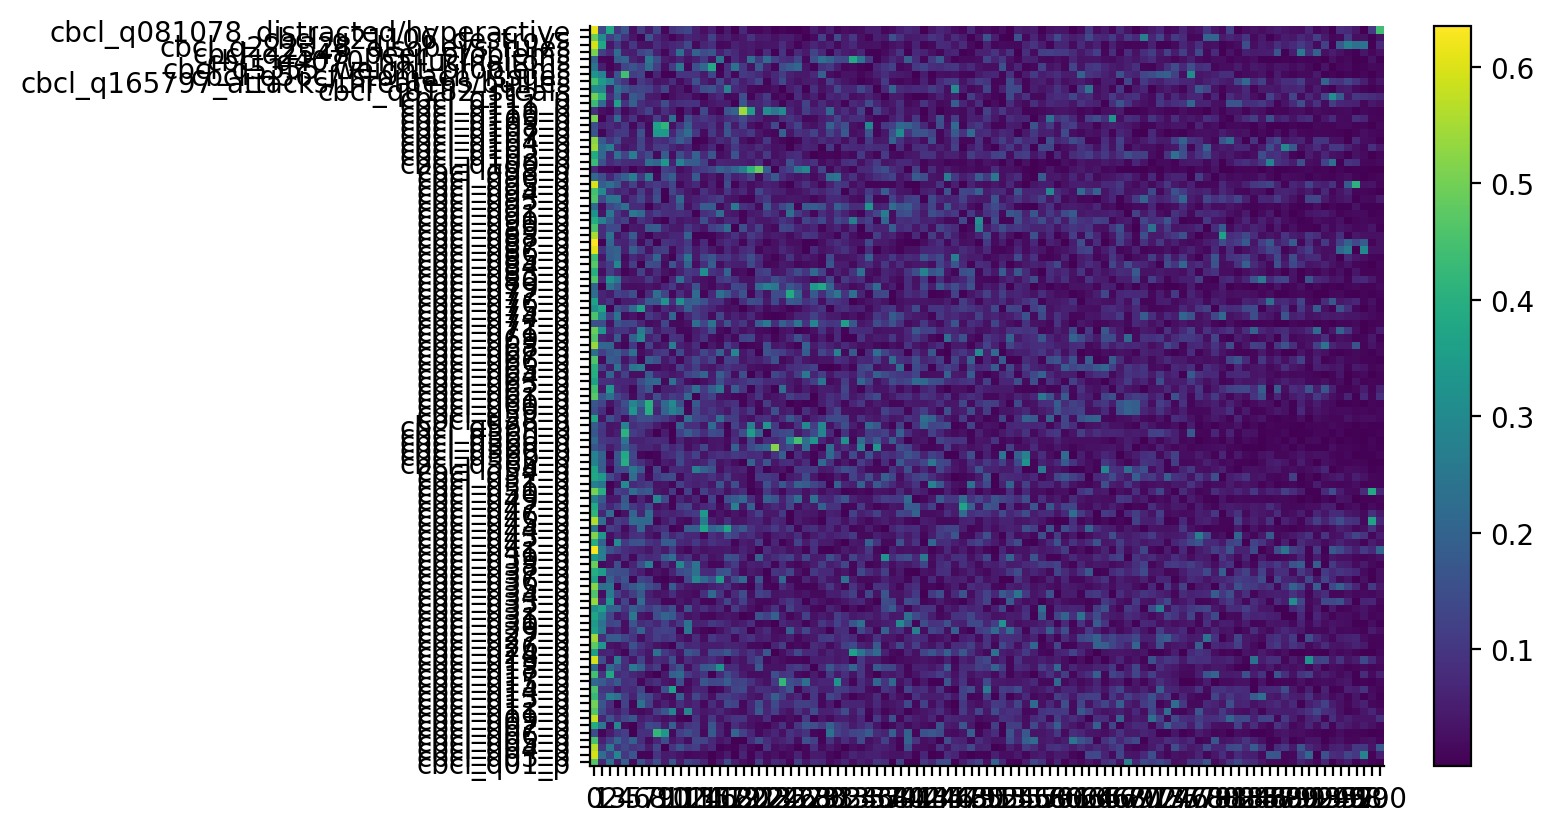

In [8]:
loadings_df = pd.DataFrame(efa.loadings_, index = EFA_df.columns)
plot_diagrams(loadings_df, diagram = "Matrix")

Eigenvalues are inspected to determine the number of factors to extract. According to the Kaiser criterion eigenvalues above 1 (for standardized data) or above the mean of the eigenvalues (for unstandardized data) should be extracted.

In [7]:
ev, v = efa.get_eigenvalues()
above_1 = np.unique((ev > 1), return_counts=True)[1][1] 
above_mean = sum(ev > ev.mean())
print(f"Inspection of the eigenvalues suggest that {above_mean} factors should be extracted.")
pd.DataFrame(efa.get_eigenvalues())


Inspection of the eigenvalues suggest that 23 factors should be extracted.


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,17.25546,3.483805,2.360689,2.223541,1.854817,1.787322,1.580749,1.477259,1.43046,1.370941,...,0.453158,0.443371,0.439005,0.429929,0.424573,0.416503,0.41316,0.393921,0.381723,0.339353
1,17.25546,3.483805,2.360689,2.223541,1.854817,1.787322,1.580749,1.477259,1.43046,1.370941,...,0.453158,0.443371,0.439005,0.429929,0.424573,0.416503,0.41316,0.393921,0.381723,0.339353


### Scree Plot 
A Scree Plot is used as another cumulative evidence for how many factors to extract. When using the zooming tool, it can be observed that the curve flattens in the area of 5-7 factors (before there are 'elbows' in which the curve has kinks). 

In [8]:
from bokeh.models import Span
scree = plots.scree_plot(ev, plot_difference= False)
hline = Span(location=1, dimension='width', line_width=1)
scree.renderers.extend([hline])
scree.xaxis.axis_label = 'Factor'
scree.yaxis.axis_label = 'Eigenvalue'
show(scree)


### Running the factor analysis with 23 Factors
To not underestimate the number of factors, we initially run the factor analysis with 23 factors as suggested by the eigenvalues. The factors are rotated and inspected for their loadings.

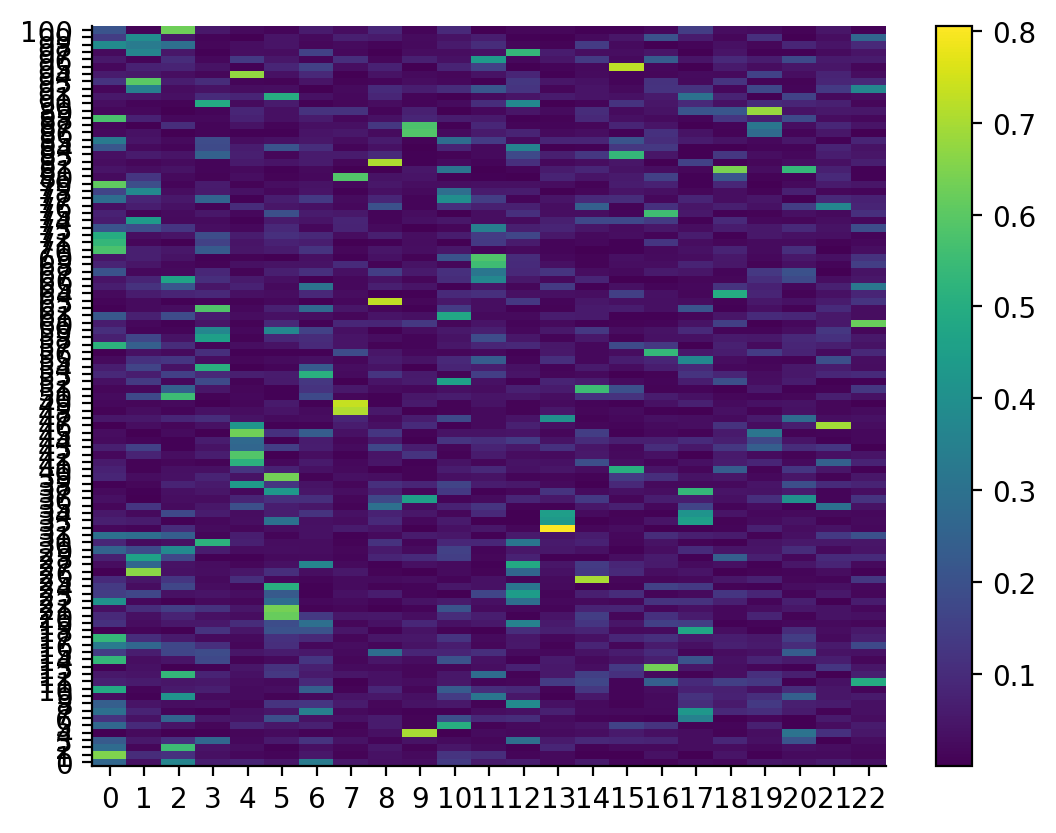

In [11]:
efa_23F = FactorAnalyzer(n_factors = 23, rotation ='geomin_obl', is_corr_matrix=False, method = 'principal')
efa_23F.fit(EFA_df)
rotated_loadings_23F = pd.DataFrame(efa_23F.loadings_).abs()
plot_diagrams(rotated_loadings_23F, "Matrix")

The loadings of the extracted factors are inspected and only factors with primary loadings are kept (criterion: 4+ loadings > .3 that do not have crossloadings with other factors <.1).

In [12]:
rotated_loadings_23F.set_index(EFA_df.columns, inplace = True)
get_primary_loadings(rotated_loadings_23F)

,0,1,2,3,4,5,10,12,17
cbcl_q72_p,0.061281,0.017396,0.004678,0.041626,0.008001,0.090720,0.013831,0.012107,0.037966
cbcl_q15_p,0.072007,0.057945,0.044957,0.052859,0.025341,0.020246,0.049493,0.013677,0.097204
cbcl_q8182_steals,0.015309,0.343894,0.025193,0.038342,0.025202,0.031431,0.099764,0.121446,0.118023
cbcl_q79_p,0.064388,0.114127,0.212661,0.044584,0.073219,0.021972,0.004545,0.012712,0.018152
cbcl_q21106_destroys,0.143616,0.390562,0.048855,0.010945,0.000927,0.042539,0.038408,0.005581,0.058723
...,...,...,...,...,...,...,...,...,...
cbcl_q96_p,0.024238,0.124915,0.020970,0.006556,0.031148,0.007305,0.007104,0.000837,0.003708
cbcl_q98_p,0.042032,0.029463,0.038198,0.010097,0.021523,0.004692,0.311413,0.010021,0.014694
cbcl_q56d_p,0.068781,0.153455,0.003515,0.038407,0.262523,0.144919,0.015093,0.052029,0.052014
cbcl_q107_p,0.019635,0.037142,0.000883,0.011463,0.005398,0.005615,0.022321,0.078494,0.039229


Since only 9 factors show clear factor loadings, the EFA is run again with 9 factors. 

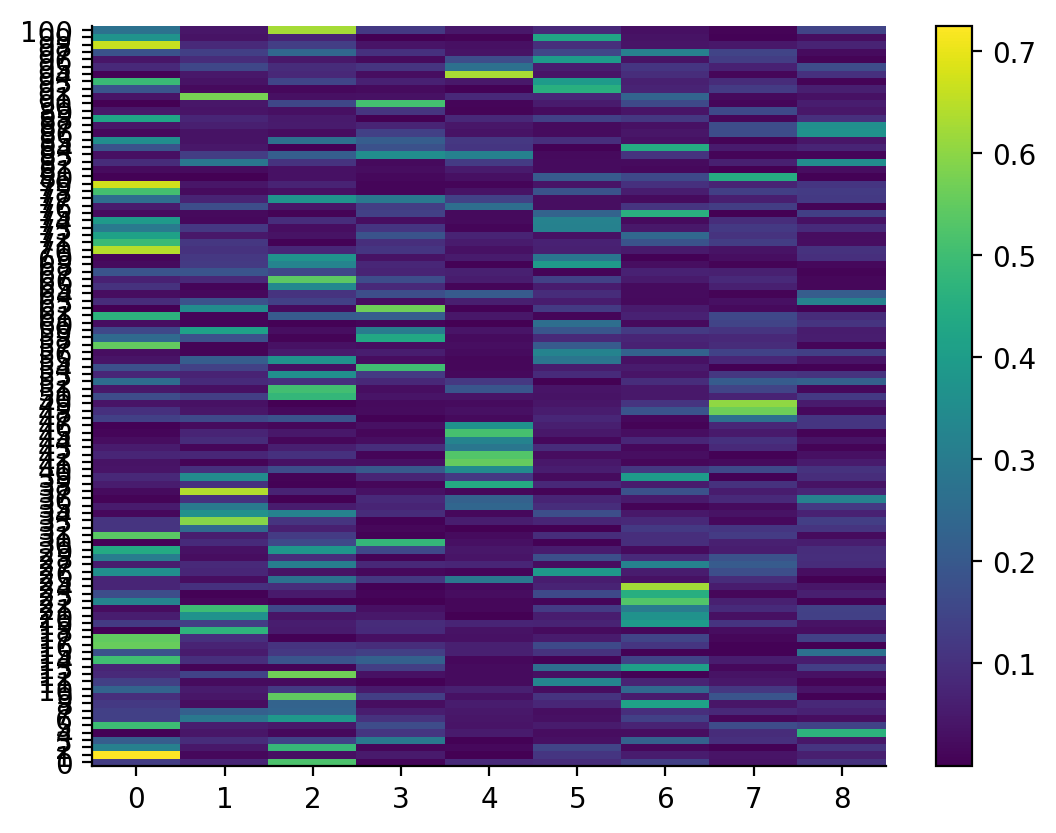

In [13]:
efa_9F = FactorAnalyzer(n_factors = 9, rotation ='geomin_obl', is_corr_matrix=False, method = 'principal')
efa_9F.fit(EFA_df)
rotated_loadings_9F = pd.DataFrame(efa_9F.loadings_).abs()
plot_diagrams(rotated_loadings_9F, "Matrix")


The loadings of the extracted factors are inspected and only factors with primary loadings are kept (criterion: 4+ loadings > .3 that do not have crossloadings with other factors <.1).

In [14]:
rotated_loadings_9F.set_index(EFA_df.columns, inplace = True)
get_primary_loadings(rotated_loadings_9F)

,0,1,2,3,4,6
cbcl_q06_p,0.004123,0.041890,0.016247,0.111008,0.050970,0.023541
cbcl_q107_p,0.016411,0.034746,0.024116,0.137795,0.034059,0.041251
cbcl_q108_p,0.040505,0.061500,0.053198,0.073082,0.042560,0.032077
cbcl_q100_p,0.088734,0.283124,0.105841,0.018231,0.126706,0.022254
cbcl_q49_p,0.006188,0.101568,0.002705,0.084173,0.223439,0.049791
...,...,...,...,...,...,...
cbcl_q75_p,0.001027,0.348499,0.020540,0.564200,0.004933,0.051418
cbcl_q96_p,0.003139,0.001615,0.031368,0.016566,0.030085,0.160985
cbcl_q65_p,0.176515,0.139486,0.029762,0.503423,0.011635,0.051195
cbcl_q26_p,0.554668,0.068044,0.107270,0.090575,0.063821,0.112401


Since only 6 factors show clear factor loadings, the EFA is run again with 6 factors. 

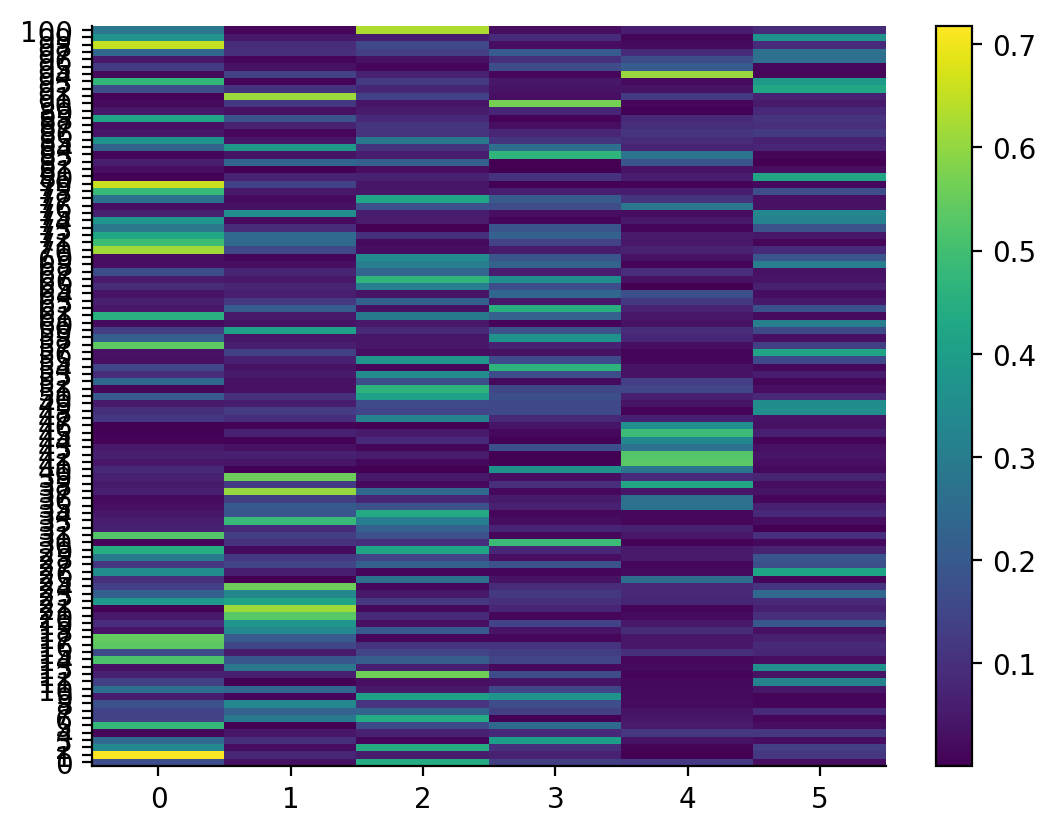

In [15]:
efa_6F = FactorAnalyzer(n_factors = 6, rotation ='geomin_obl', is_corr_matrix=False, method = 'principal')
efa_6F.fit(EFA_df)
rotated_loadings_6F = pd.DataFrame(efa_6F.loadings_).abs()
plot_diagrams(rotated_loadings_6F, "Matrix")

The loadings of the extracted factors are inspected and only factors with primary loadings are kept (criterion: 4+ loadings > .3 that do not have crossloadings with other factors <.1).

In [16]:
rotated_loadings_6F.set_index(EFA_df.columns, inplace = True)
get_primary_loadings(rotated_loadings_6F)

,0,1,2,3,4,5
cbcl_q8182_steals,0.164319,0.104282,0.077051,0.035063,0.034694,0.426901
cbcl_q67_p,0.032381,0.138755,0.024842,0.031233,0.011219,0.422258
cbcl_q96_p,0.003770,0.068316,0.065877,0.103154,0.056930,0.422149
cbcl_q37_p,0.351690,0.061724,0.009846,0.010629,0.019210,0.420052
cbcl_q165797_attacks/threatens/bullies,0.472839,0.007651,0.121110,0.044464,0.019867,0.386755
...,...,...,...,...,...,...
cbcl_q13_p,0.057408,0.013741,0.409223,0.372570,0.019304,0.009033
cbcl_q36_p,0.098907,0.000215,0.269535,0.033984,0.253412,0.008728
cbcl_q56e_p,0.007853,0.005756,0.080616,0.003232,0.335590,0.006171
cbcl_q44_p,0.062319,0.086671,0.219530,0.070921,0.062236,0.002525


## Factor Inspection
The factor solution stabilized at six factors. Therefore we inspect these six factors first.

In [17]:
abcd = abcd_dict("abcd_cbcl01")
loadings_data = rotated_loadings_6F.rename(index=abcd)
loadings_data.rename({0: 'F1', 1: 'F2', 2: 'F3', 3: 'F4', 4: 'F5', 5: 'F6'}, axis=1, inplace = True)


Since we used Principal Axis Factoring and not Principal Component Analysis (as Michelini et al., 2019) as an extraction method, we obtained lower loadings in general. Thus, we decided to scale the threshold accordingly. We then accepted a .3 threshold for primary loadings as this is also accepted in the literature for data set of this size (CITE).

In [18]:
# F1 Externalizing (Antagonistic)
F1 = loadings_data.sort_values("F1", ascending = False)
F1.rename(index=abcd, inplace= True)
F1 = pd.DataFrame(F1["F1"])
F1_styler = F1.round(4).style.applymap(color)
F1_styler

,F1
Argues a lot,0.717500
Temper tantrums or hot temper,0.656400
cbcl_q222328_disobeys_rules,0.655400
"Stubborn, sullen, or irritable",0.617700
Easily jealous,0.546000
Screams a lot,0.540700
Doesn't seem to feel guilty after misbehaving,0.538000
Lying or cheating,0.525700
Demands a lot of attention,0.513000
Sudden changes in mood or feelings,0.492400


In [19]:
# F2 Internalizing
F2 = loadings_data.sort_values("F2", ascending = False)
F2.rename(index=abcd, inplace= True)
F2 = pd.DataFrame(F2["F2"])
F2_styler = F2.round(4).style.applymap(color)
F2_styler

,F2
Worries,0.610600
Feels they have to be perfect,0.608900
Too fearful or anxious,0.603800
Feels worthless or inferior,0.557600
Feels too guilty,0.555500
Fears they might think or do something bad,0.532300
"Nervous, highstrung, or tense",0.482400
Feels or complains that no one loves them,0.417100
Self-conscious or easily embarrassed,0.405500
"Unhappy, sad, or depressed",0.386200


In [20]:
# F3 Neurodevelopmental 
F3 = loadings_data.sort_values("F3", ascending = False)
F3.rename(index=abcd, inplace= True)
F3 = pd.DataFrame(F3["F3"])
F3_styler = F3.round(4).style.applymap(color)
F3_styler

,F3
cbcl_q081078_distracted/hyperactive,0.628400
Daydreams or gets lost in their thoughts,0.559100
Stares blankly,0.466000
Poorly coordinated or clumsy,0.460200
Fails to finish things they start,0.442700
Acts too young for their age,0.440800
Can't get their mind off certain thoughts; obsessions,0.440700
Nervous movements or twitching,0.432300
Talks too much,0.422800
Impulsive or acts without thinking,0.419400


In [21]:
# F4 Detachment
F4 = loadings_data.sort_values("F4", ascending = False)
F4.rename(index=abcd, inplace= True)
F4= pd.DataFrame(F4["F4"])
F4_styler = F4.round(4).style.applymap(color)
F4_styler

,F4
"Withdrawn, doesn't get involved with others",0.567100
Would rather be alone than with others,0.488300
"Underactive, slow moving, or lacks energy",0.467800
Refuses to talk,0.465200
Too shy or timid,0.455800
There is very little they enjoy,0.397500
Confused or seems to be in a fog,0.372600
"Secretive, keeps things to self",0.363900
Overtired without good reason,0.363400
Stares blankly,0.350600


In [22]:
# F5 Somatoform
F5 = loadings_data.sort_values("F5", ascending = False)
F5.rename(index=abcd, inplace= True)
F5 = pd.DataFrame(F5["F5"])
F5_styler = F5.round(4).style.applymap(color)
F5_styler

,F5
cbcl_q56cf_stomach_issues,0.606100
Aches or pains (not stomach or headaches),0.534900
Headaches,0.526900
"Vomiting, throwing up",0.488700
Feels dizzy or lightheaded,0.421600
Other (physical problems without known physical cause),0.354500
Rashes or other skin problems,0.335600
Talks or walks in sleep,0.284500
Overtired without good reason,0.276400
"Underactive, slow moving, or lacks energy",0.272200


In [23]:
# F5 Externalizing (Disinhibited)
F6 = loadings_data.sort_values("F6", ascending = False)
F6.rename(index=abcd, inplace= True)
F6 = pd.DataFrame(F6["F6"])
F6_styler = F6.round(4).style.applymap(color)
F6_styler

,F6
cbcl_q8182_steals,0.426900
Runs away from home,0.422300
Thinks about sex too much,0.422100
Gets in many fights,0.420100
cbcl_q165797_attacks/threatens/bullies,0.386800
cbcl_q21106_destroys,0.362100
Deliberately harms self or attempts suicide,0.356400
Plays with own sex parts in public,0.355700
Plays with own sex parts too much,0.345400
Talks about killing self,0.332400


## Factor Loading Structure
To obtain a parsimonous and clear factor structure, items with low loadings or crossloadings are removed and the ...

In [24]:
loadings_data_new = get_primary_loadings(rotated_loadings_6F, delete = True)
loadings_df = EFA_df[loadings_data_new.index]

#remove low loadings 
list_to_drop = []

for row_index in loadings_data_new.index:
    row_vals = loadings_data_new.loc[row_index].to_numpy() 

    if (row_vals < 0.3).all():
        list_to_drop.append(row_index)

loadings_df_new = loadings_df.drop(loadings_df[list_to_drop], axis = 1)
loadings_df_new

,cbcl_q8182_steals,cbcl_q67_p,cbcl_q96_p,cbcl_q59_p,cbcl_q60_p,cbcl_q15_p,cbcl_q72_p,cbcl_q84_p,cbcl_q34_p,cbcl_q30_p,...,cbcl_q74_p,cbcl_q42_p,cbcl_q95_p,cbcl_q65_p,cbcl_q09_p,cbcl_q87_p,cbcl_q56cf_stomach_issues,cbcl_q12_p,cbcl_q102_p,cbcl_q56e_p
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
clear_loadings_data = rotated_loadings_6F.loc[loadings_df_new.columns]

In [26]:
clear_loadings_df1 = clear_loadings_data.rename(index=abcd)
clear_loadings_df = clear_loadings_df1.rename({0: 'F1', 1: 'F2', 2: 'F3', 3: 'F4', 4: 'F5', 5: 'F6'}, axis=1)


In [27]:
#loadings_data[loadings_data['F1'].sort_values(ascending=False) > .3]
primaryL_F1 = clear_loadings_df[clear_loadings_df['F1'] > .35].sort_values('F1', ascending=False)
primaryL_F2 = clear_loadings_df[clear_loadings_df['F2'] > .35].sort_values('F2', ascending=False)
primaryL_F3 = clear_loadings_df[clear_loadings_df['F3'] > .35].sort_values('F3', ascending=False)
primaryL_F4 = clear_loadings_df[clear_loadings_df['F4'] > .35].sort_values('F4', ascending=False)
primaryL_F5 = clear_loadings_df[clear_loadings_df['F5'] > .35].sort_values('F5', ascending=False)
primaryL_F6 = clear_loadings_df[clear_loadings_df['F6'] > .35].sort_values('F6', ascending=False)


primaryL_list = [primaryL_F1, primaryL_F2, primaryL_F3, primaryL_F4, primaryL_F5, primaryL_F6]  # List of your dataframes
ordered_PL = pd.concat(primaryL_list)
ordered_PL


,F1,F2,F3,F4,F5,F6
Argues a lot,0.717500,0.078315,0.053079,0.066791,0.002584,0.113900
Temper tantrums or hot temper,0.656437,0.142621,0.041211,0.004739,0.006652,0.015257
cbcl_q222328_disobeys_rules,0.655377,0.088764,0.156163,0.025571,0.017832,0.085975
"Stubborn, sullen, or irritable",0.617732,0.155083,0.024042,0.052203,0.065156,0.084452
Easily jealous,0.546047,0.204072,0.013774,0.013449,0.044864,0.065453
Screams a lot,0.540670,0.059530,0.044206,0.065083,0.025876,0.133294
Doesn't seem to feel guilty after misbehaving,0.538022,0.151926,0.104177,0.104751,0.044522,0.085586
Lying or cheating,0.525666,0.126862,0.174149,0.013653,0.043573,0.095501
Demands a lot of attention,0.512996,0.191592,0.211538,0.145207,0.013709,0.023592
Sudden changes in mood or feelings,0.492440,0.243037,0.019404,0.142999,0.044081,0.012441


In [28]:
def make_bold(val):

    bold = 'bold' if val > .35 else ''

    return 'font-weight: %s' % bold

In [29]:
ordered_PL_bold = ordered_PL.style.applymap(make_bold)
ordered_PL_bold

,F1,F2,F3,F4,F5,F6
Argues a lot,0.717500,0.078315,0.053079,0.066791,0.002584,0.113900
Temper tantrums or hot temper,0.656437,0.142621,0.041211,0.004739,0.006652,0.015257
cbcl_q222328_disobeys_rules,0.655377,0.088764,0.156163,0.025571,0.017832,0.085975
"Stubborn, sullen, or irritable",0.617732,0.155083,0.024042,0.052203,0.065156,0.084452
Easily jealous,0.546047,0.204072,0.013774,0.013449,0.044864,0.065453
Screams a lot,0.540670,0.059530,0.044206,0.065083,0.025876,0.133294
Doesn't seem to feel guilty after misbehaving,0.538022,0.151926,0.104177,0.104751,0.044522,0.085586
Lying or cheating,0.525666,0.126862,0.174149,0.013653,0.043573,0.095501
Demands a lot of attention,0.512996,0.191592,0.211538,0.145207,0.013709,0.023592
Sudden changes in mood or feelings,0.492440,0.243037,0.019404,0.142999,0.044081,0.012441


In [30]:
# non primary loadings 
NonPL = EFA_df.rename(columns=abcd)
non_pl = ~NonPL.columns.isin(ordered_PL.index)
NonPL_df = loadings_data.loc[non_pl]


In [31]:
# export 
ordered_PL.to_latex(buf= 'final_results/Baseline_PrimaryLoadings_table.tex')
ordered_PL_bold.to_latex(buf= 'final_results/Baseline_PrimaryLoadings_bold_table.tex')
NonPL_df.to_latex(buf= 'final_results/Baseline_NonPrimaryLoadings_table.tex')

ordered_PL.to_csv('final_results/Baseline_PrimaryLoadings_table', index=False)
NonPL_df.to_csv('final_results/Baseline_NonPrimaryLoadings_table', index=False)


/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_2249/1065629366.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ordered_PL.to_latex(buf= 'final_results/PrimaryLoadings_table.tex')
/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_2249/1065629366.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  NonPL_df.to_latex(buf= 'final_results/NonPrimaryLoadings_table.tex')
